# Comparison of cellpose and dnmf

In [82]:
import pickle
from DLC_for_WBFM.utils.postprocessing.postprocessing_utils import *
from DLC_for_WBFM.bin.configuration_definition import *
%load_ext autoreload
%autoreload 2

fname_cellpose = 'all_traces_3d_cellpose.pickle'
fname_dnmf = 'all_traces_3d_7slices.pickle'
config_fname = 'test_project.pickle'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
traces_cp = pickle.load(open(fname_cellpose, 'rb'))
traces_dnmf = pickle.load(open(fname_dnmf, 'rb'));
config = load_config(config_fname)

In [90]:
config.preprocessing.fps

5.0

## Overview

### First, DNMF

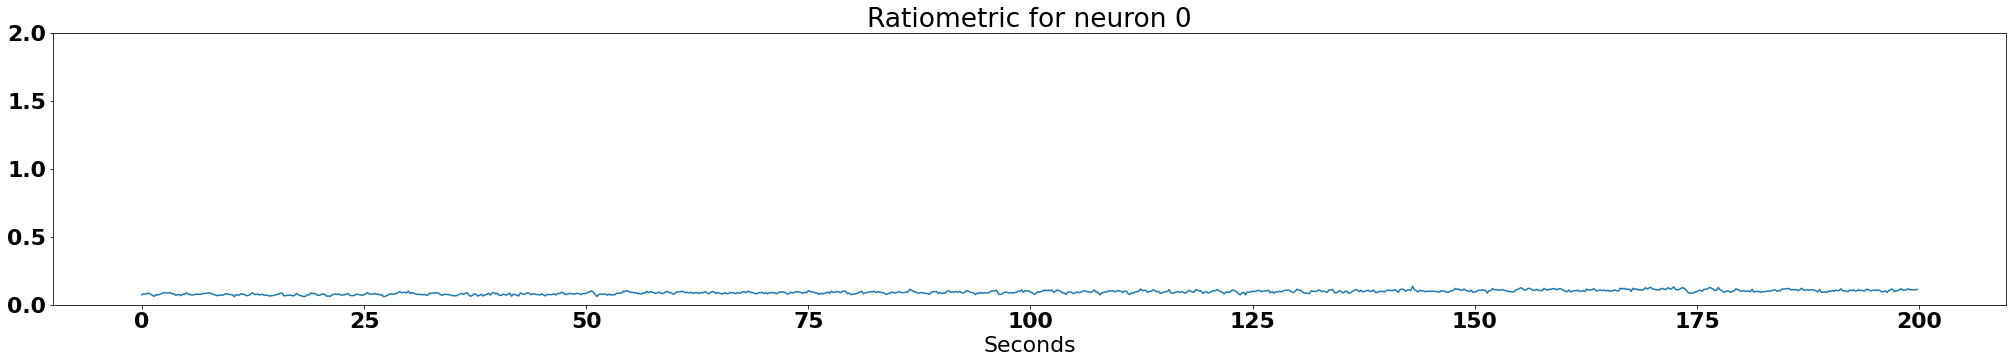

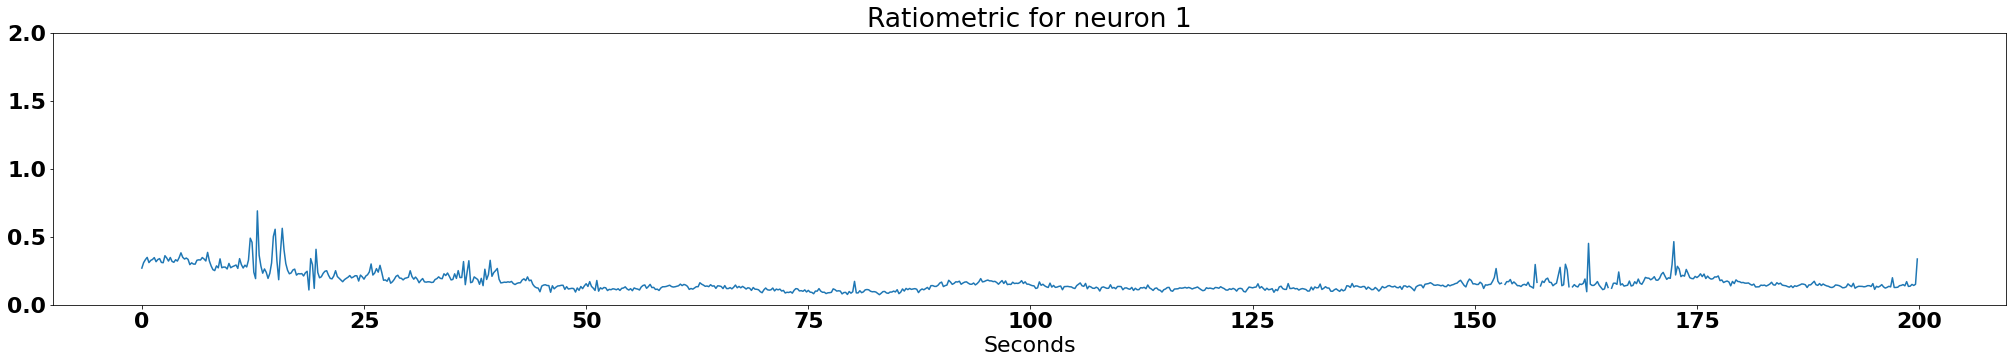

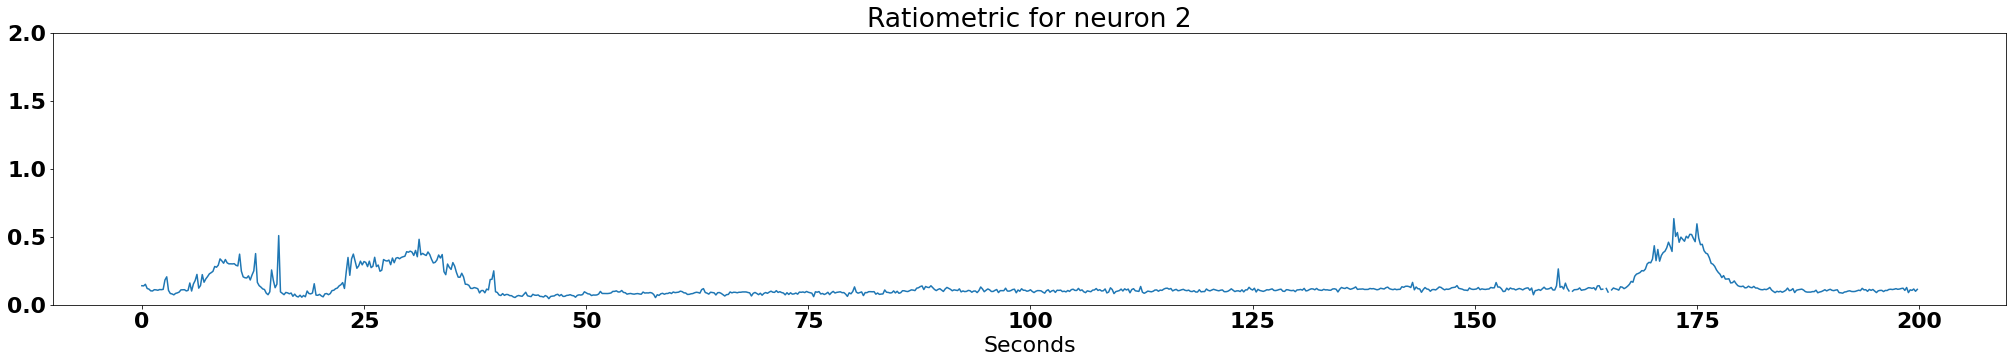

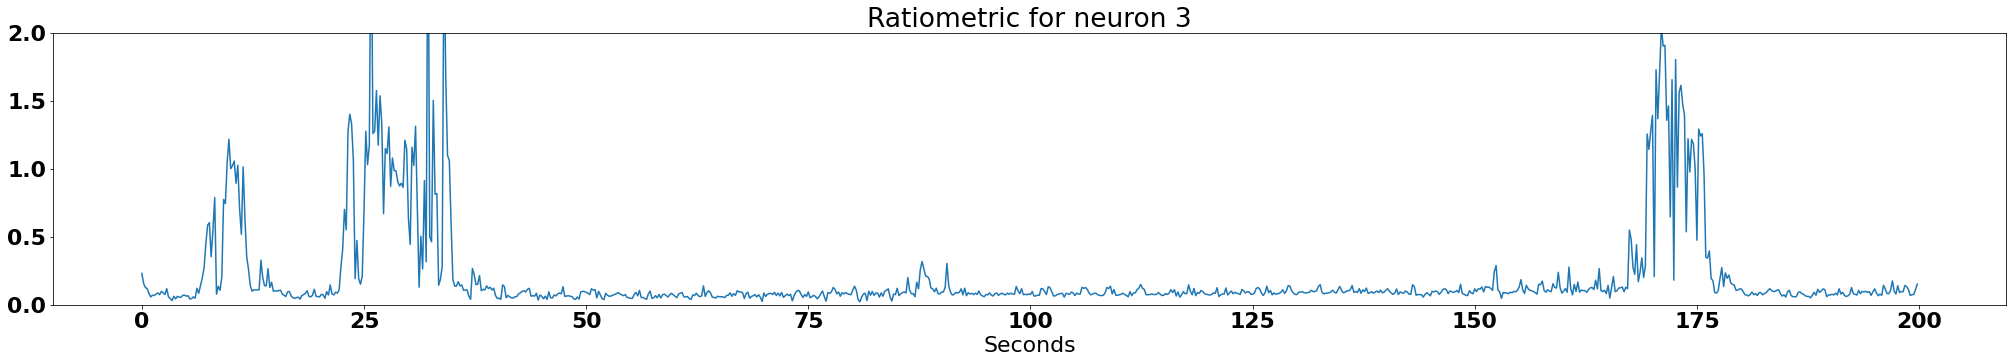

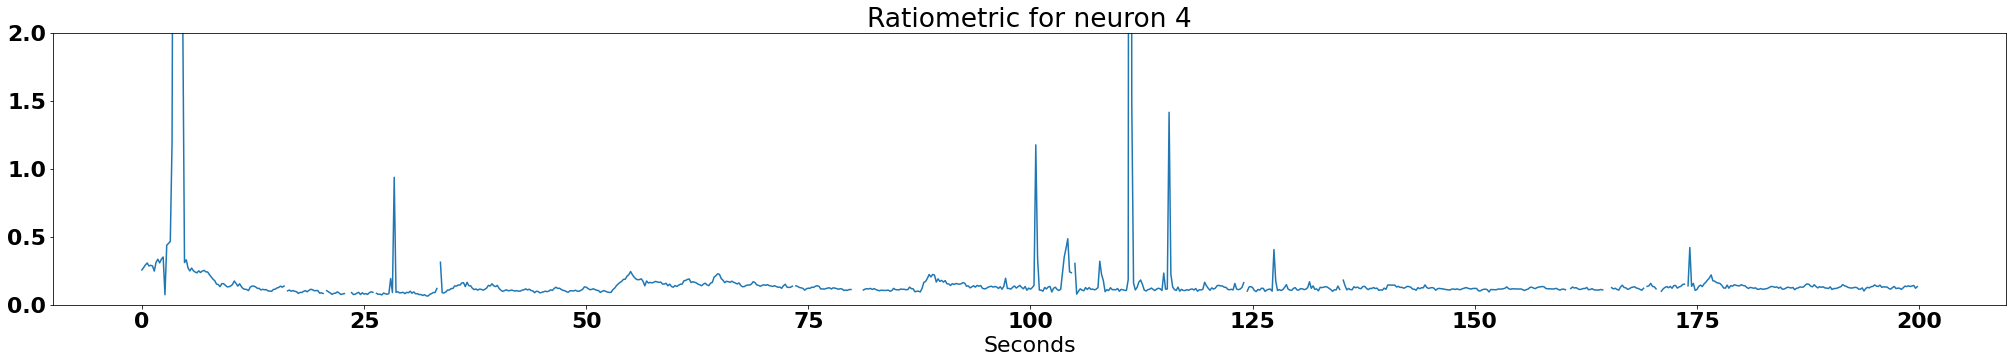

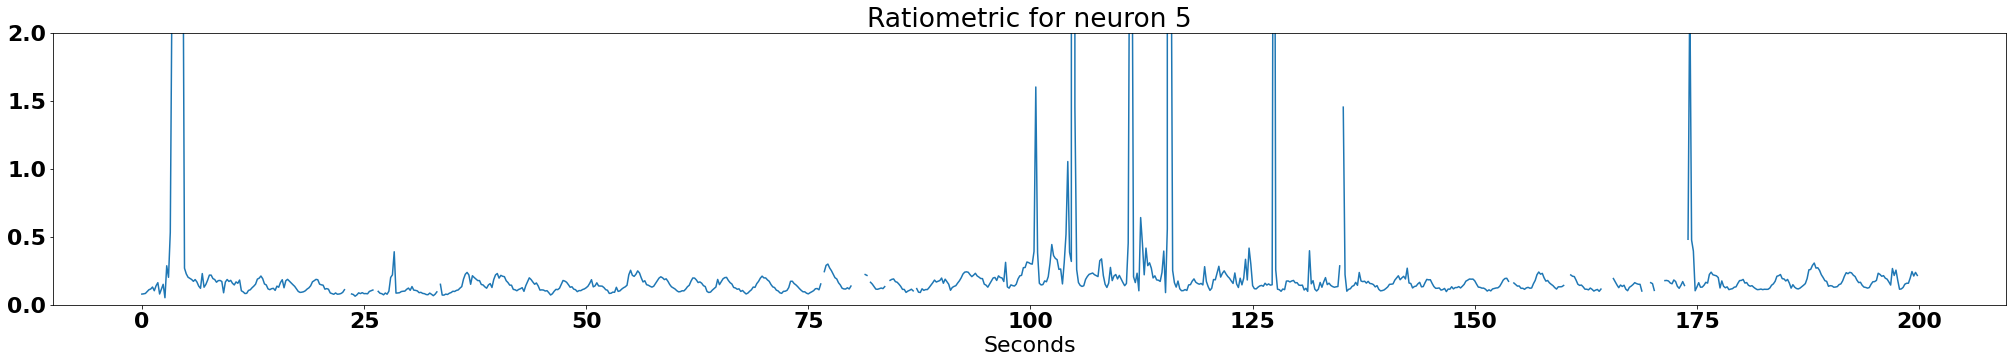

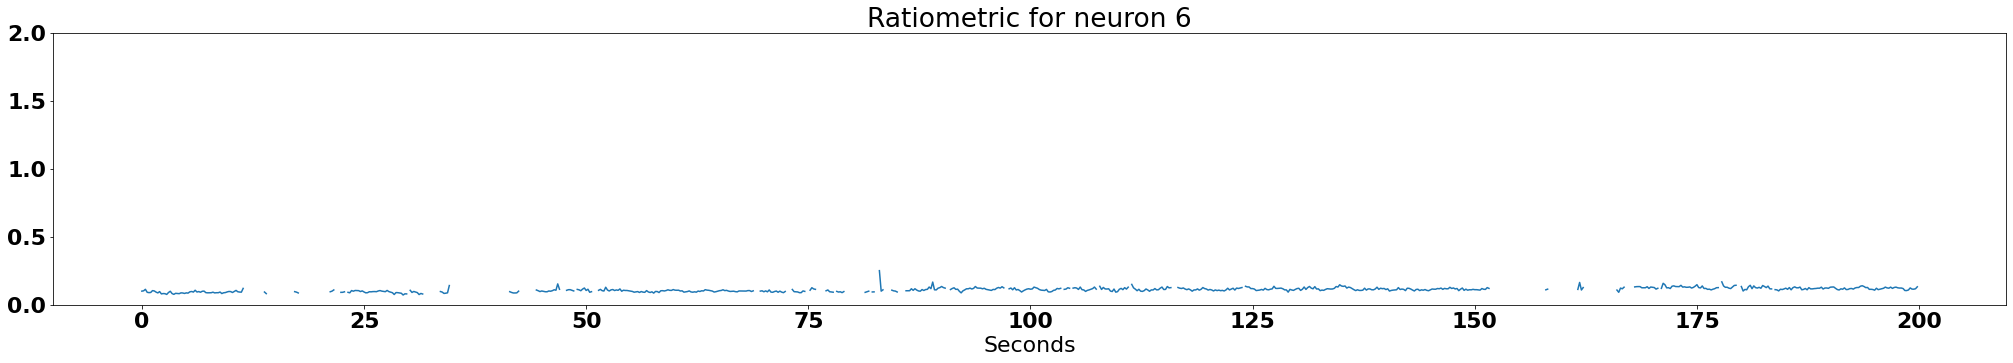

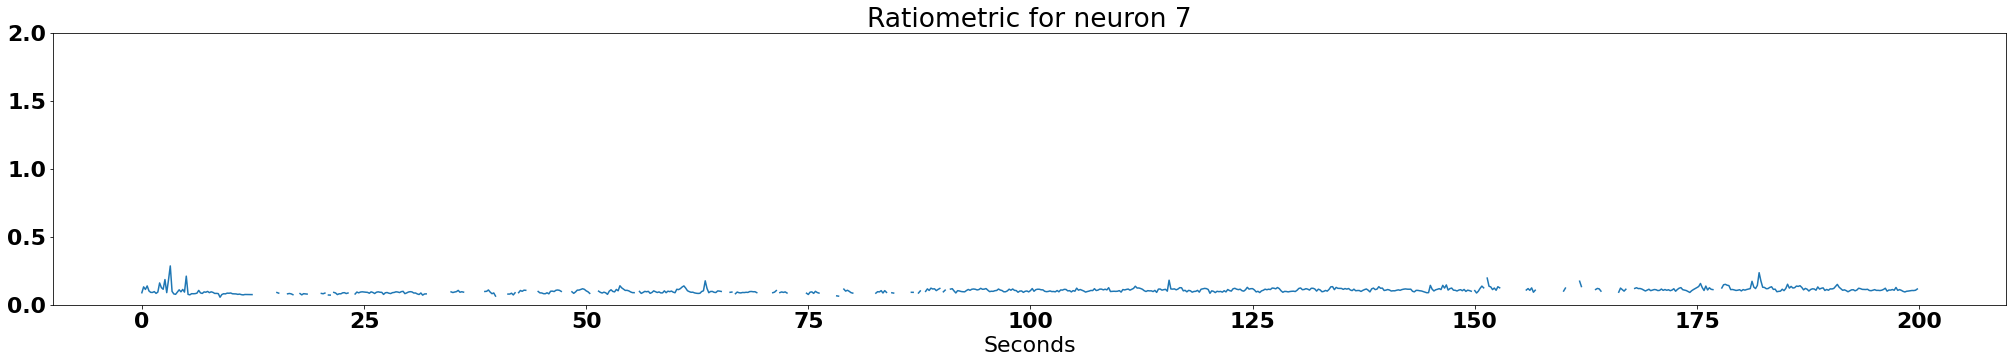

In [94]:
tspan = np.array(range(config.preprocessing.num_frames)) / config.preprocessing.fps

plot_f = lambda t, which_neuron, name, preprocess_func : visualize_ratio(t, name, which_neuron, background=[0,0], preprocess_func=preprocess_func, tspan=tspan)
preprocess_f = lambda dat, which_neuron : nan_tracking_failures(config, dat, which_neuron)


visualize_all_traces(traces_dnmf, plot_subfunction=plot_f, preprocess_func=preprocess_f)

### Second, cellpose-based segmentation

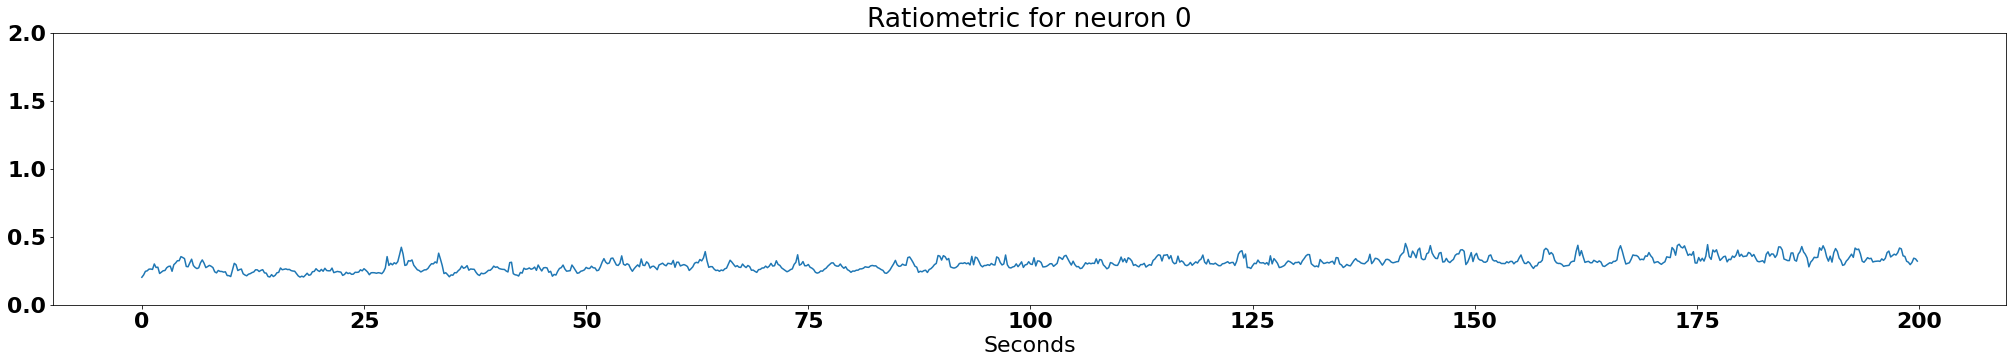

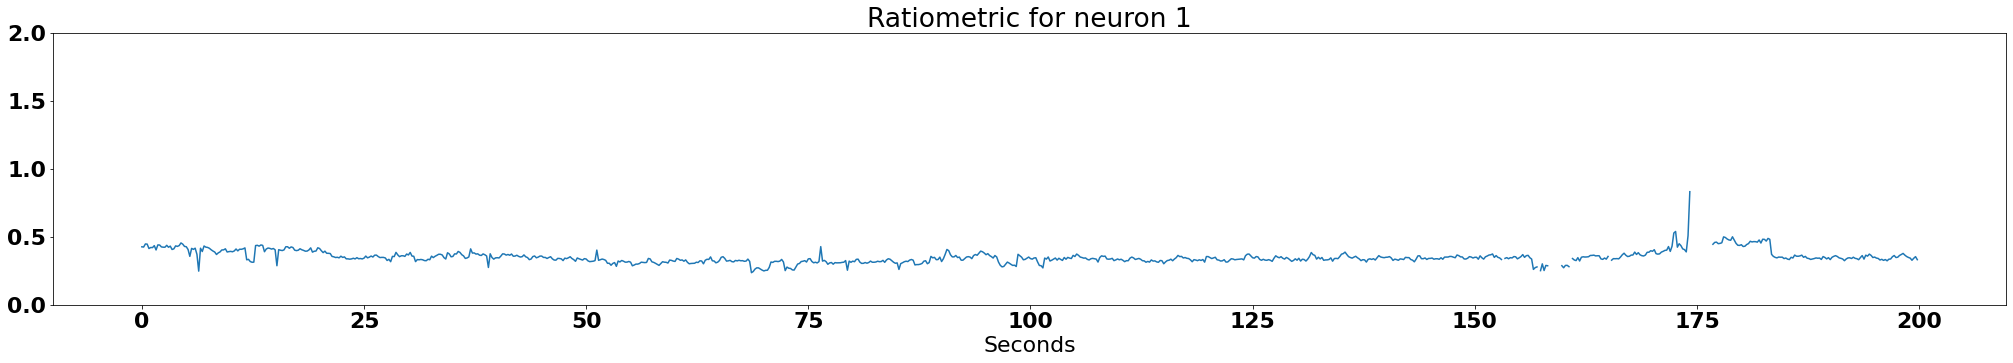

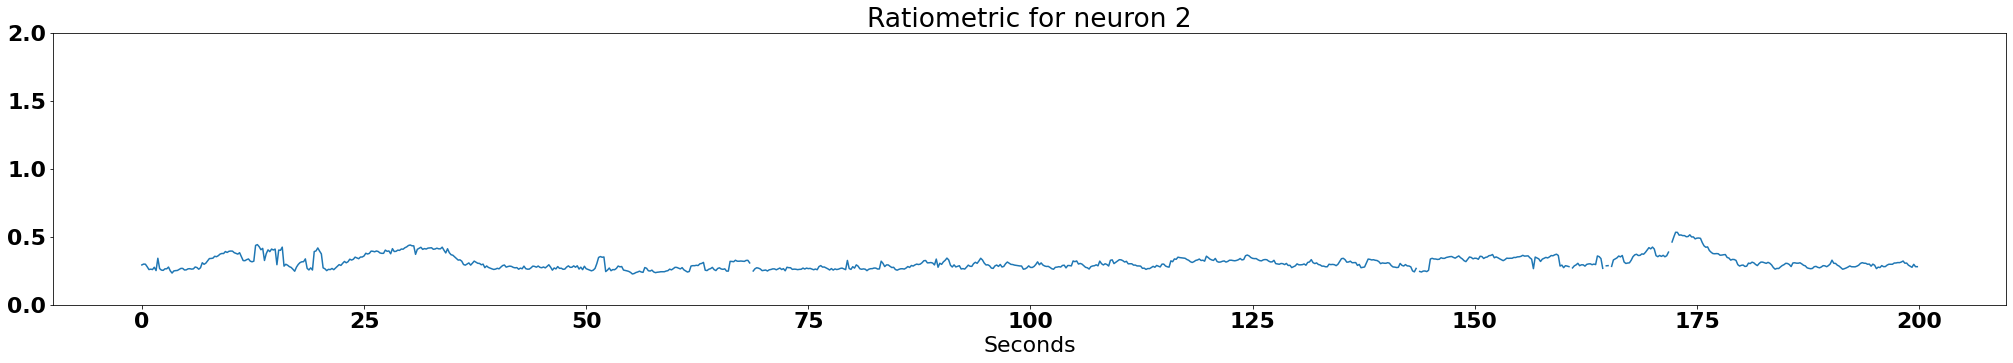

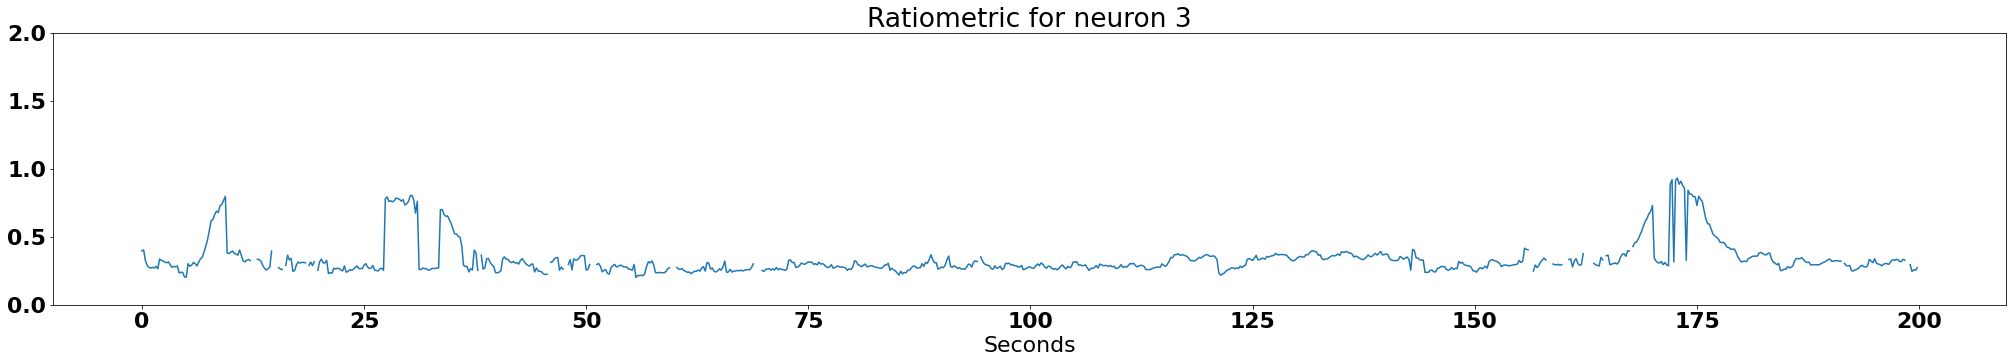

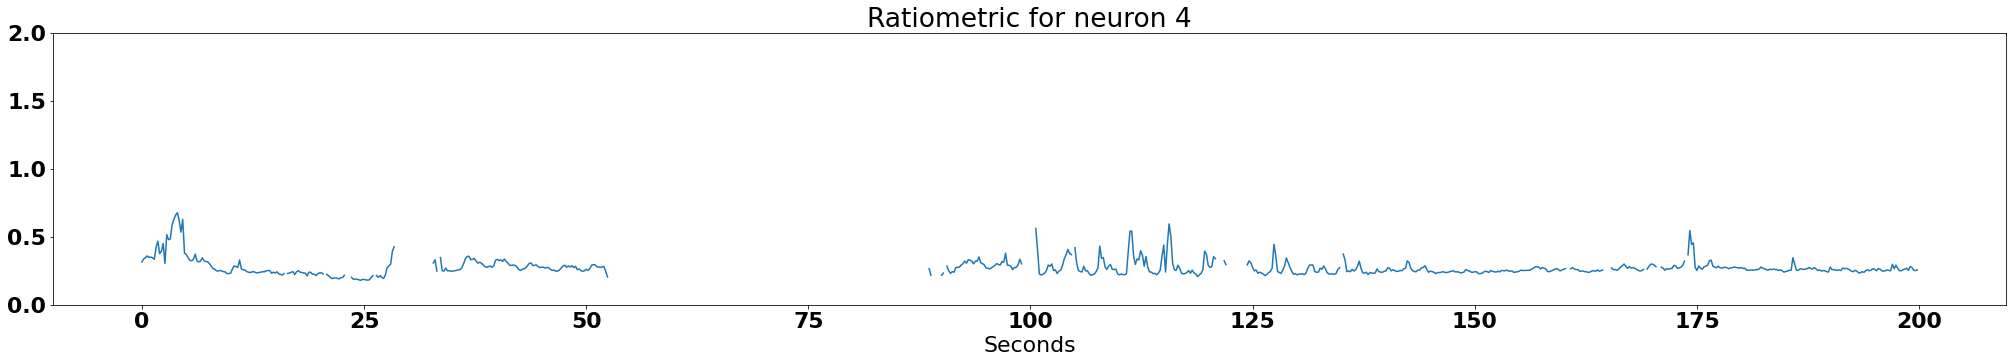

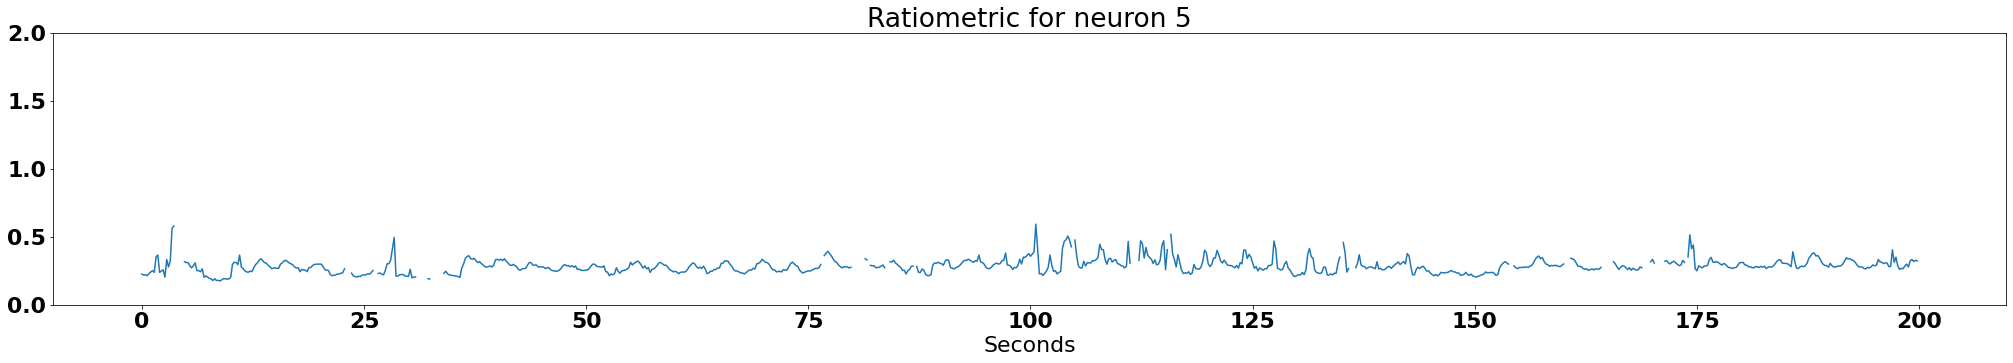

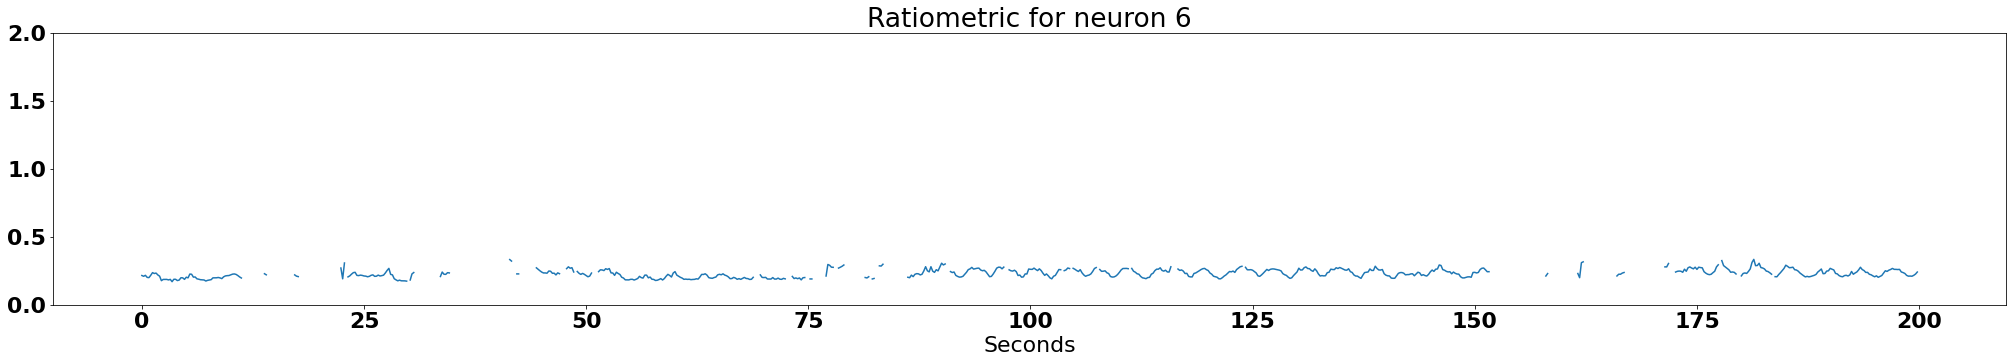

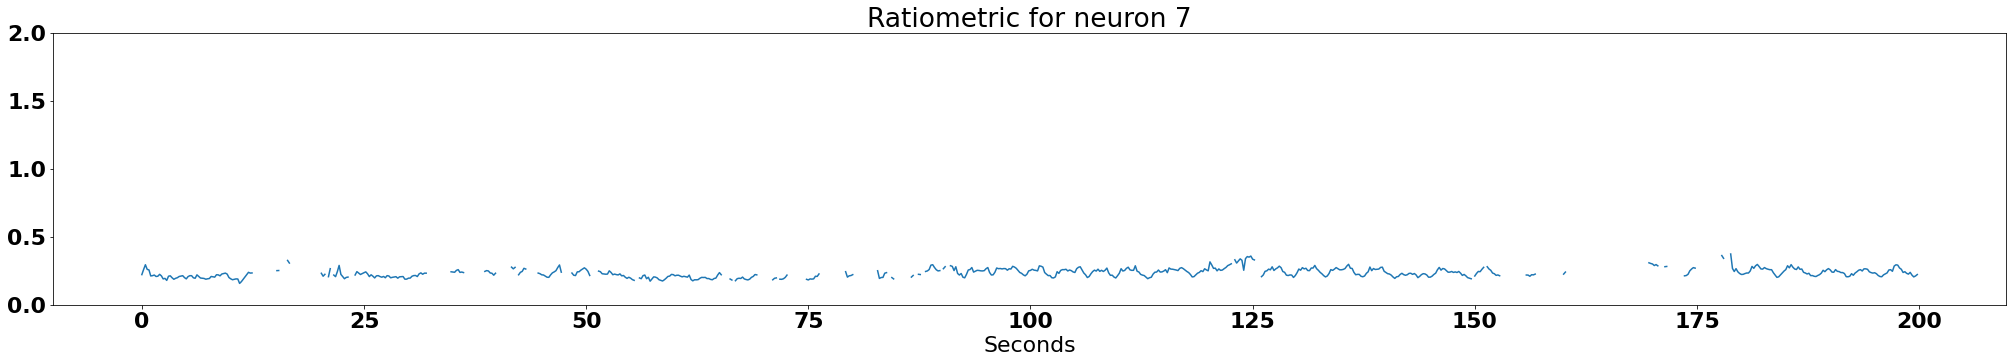

In [95]:
tspan = np.array(range(config.preprocessing.num_frames)) / config.preprocessing.fps

plot_f = lambda t, which_neuron, name, preprocess_func : visualize_ratio(t, name, which_neuron, background=[0,0], preprocess_func=preprocess_func, tspan=tspan)
preprocess_f = lambda dat, which_neuron : nan_tracking_failures(config, dat, which_neuron)


visualize_all_traces(traces_cp, plot_subfunction=plot_f, preprocess_func=preprocess_f)

## Comparisons

(0.0, 1.0)

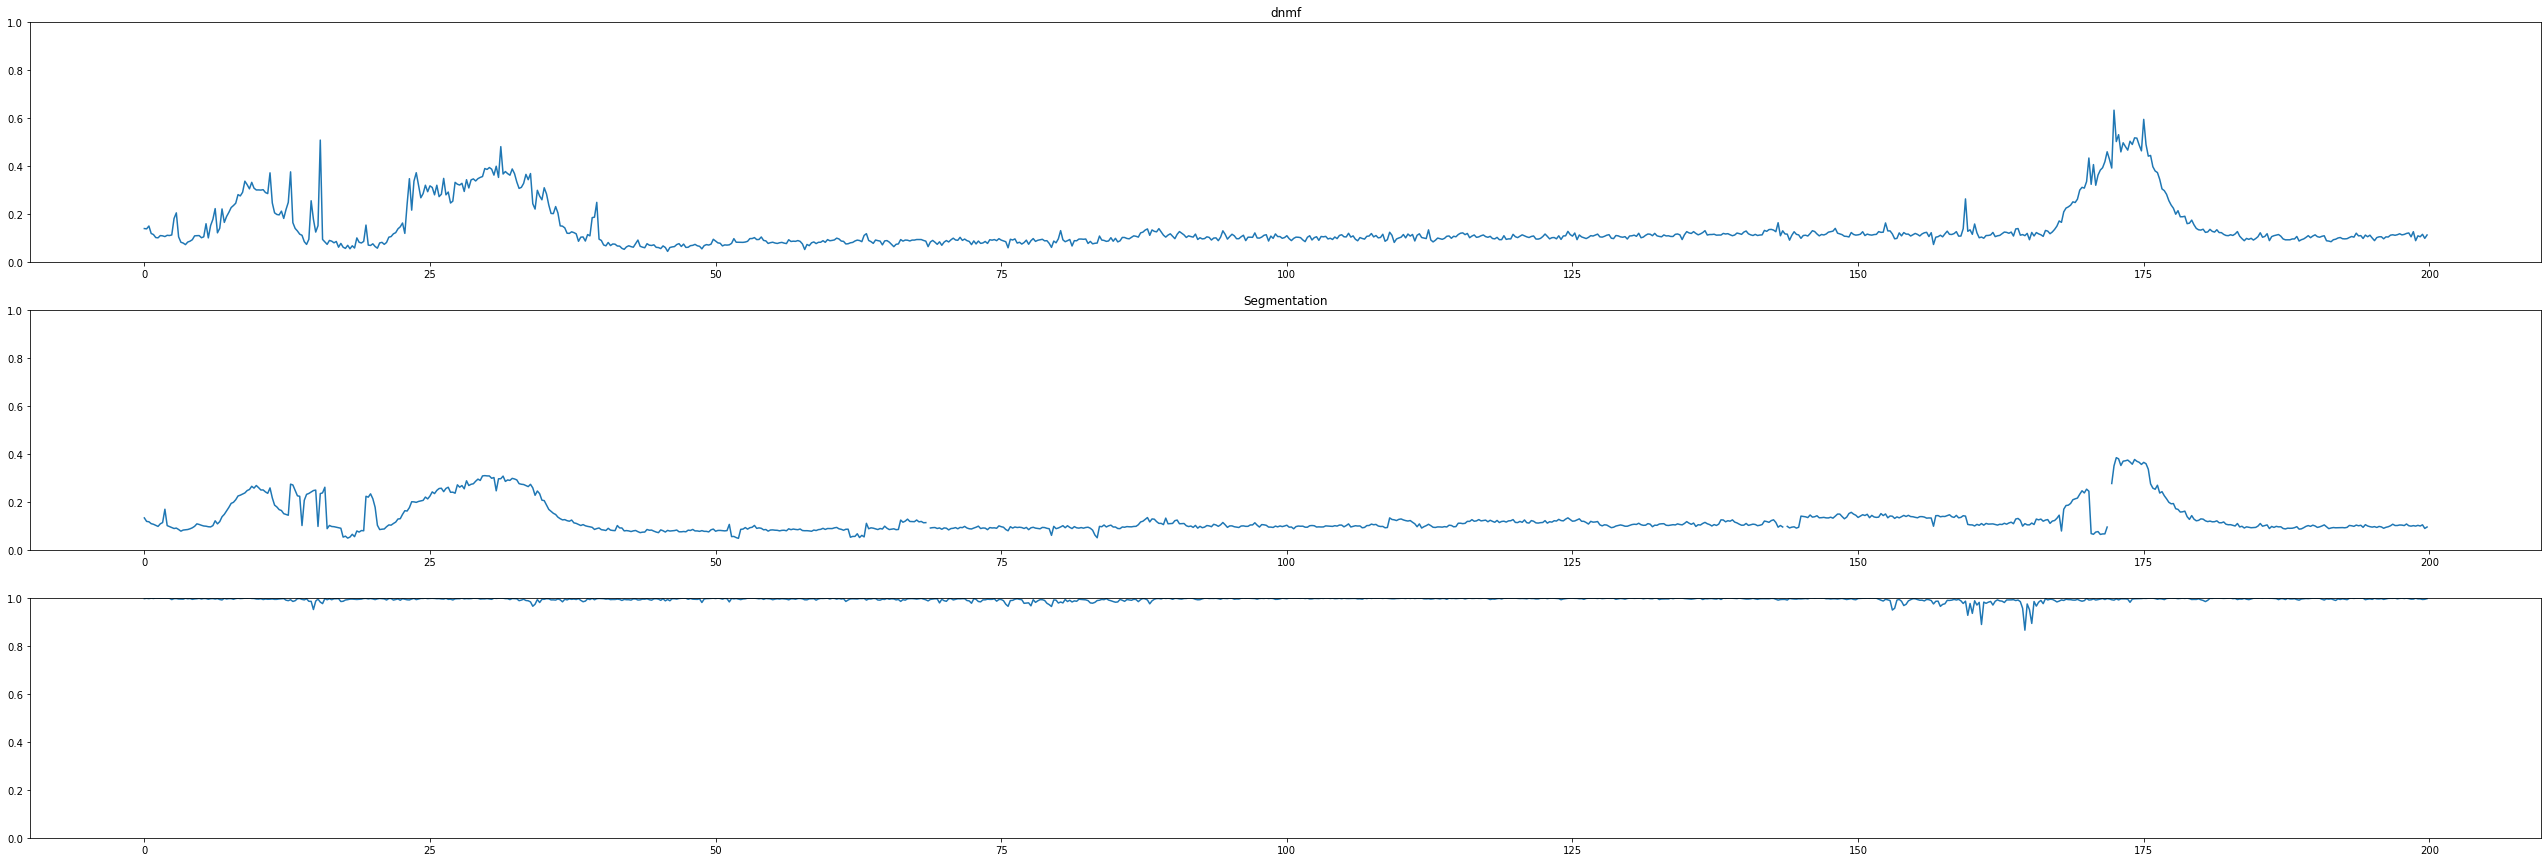

In [41]:
which_neuron = 2

this_xy, this_prob = xy_from_dlc_dat(config.tracking.annotation_fname, which_neuron=which_neuron, num_frames=1000)

tspan = np.array(range(1000))/5.0


plt.figure(figsize=(45,15))

plt.subplot(311)
g = traces_dnmf[which_neuron]['gcamp']
r = traces_dnmf[which_neuron]['mcherry']
plt.plot(tspan, g / r)
plt.ylim([0,1])
plt.title('dnmf')

plt.subplot(312)
g = traces_cp[which_neuron]['green']
r = traces_cp[which_neuron]['red']
plt.plot(tspan, (g-15) / (r-15))
plt.ylim([0,1])
plt.title('Segmentation')

plt.subplot(313)
plt.plot(tspan, this_prob)
plt.ylim([0,1])